##Library and PyPI

In [35]:
# library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
!pip install tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021(usetex=False))

##Data Preprocessing

In [67]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")
dataset.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,SE,FT,Cyber Security Engineer,120000,USD,120000,US,100,US,L
1,2022,SE,FT,Penetration Tester,150000,USD,150000,US,100,US,M
2,2022,EX,FT,Cyber Threat Intelligence Analyst,287500,USD,287500,US,50,US,L
3,2022,SE,FT,Threat Intelligence Response Analyst,220000,USD,220000,US,100,US,L
4,2021,MI,FT,Cyber Threat Intelligence Analyst,97000,USD,97000,US,100,US,L


In [68]:
#utilize the job title  
dataset = dataset.replace('Cybersecurity Training Specialist','Cyber Security Training Specialist')
dataset = dataset.replace('Cybersecurity Researcher','Cyber Security Researcher')
dataset = dataset.replace('Cybersecurity Engineer','Cyber Security Engineer')
dataset = dataset.replace('Cybersecurity Architect','Cyber Security Architect')
dataset = dataset.replace('Cybersecurity Specialist','Cyber Security Specialist')
dataset = dataset.replace('Cybersecurity Analyst','Cyber Security Analyst') 

In [69]:
#we only interest in 2020
dataset_2020 = dataset[dataset["work_year"] == '2020']


## Analysis: 
Test whether the mean salary for each level differ across the location

In [72]:
# select the location and full time
pure_data_2020_USA =  dataset_2020[dataset_2020.company_location=='US']
pure_data_2020_not_USA = dataset_2020[dataset_2020.company_location!='US']

### Full time jobs with entry level

In [73]:
# Full time jobs with entry level 2020

pure_data_2020_USA_1 = pure_data_2020_USA[pure_data_2020_USA.experience_level == 'EN']
pure_data_2020_USA_1_FT = pure_data_2020_USA_1[pure_data_2020_USA_1.employment_type == 'FT']

pure_data_2020_not_USA_1 = pure_data_2020_not_USA[pure_data_2020_not_USA.experience_level == 'EN']
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1[pure_data_2020_not_USA_1.employment_type == 'FT']


# still we want to compare with the same job 
# job-titles in 2020,2021 and 2021e
usa_job = pure_data_2020_USA_1_FT.job_title.unique()
no_usa_job = pure_data_2020_not_USA_1_FT.job_title.unique()

# Find jobs only in one of the two year job sets
unmatched_jobs = np.setxor1d(usa_job,no_usa_job) 
print(unmatched_jobs)

# get new dataset
pure_data_2020_USA_1_FT = pure_data_2020_USA_1_FT.drop(pure_data_2020_USA_1_FT[pure_data_2020_USA_1_FT.job_title.isin(unmatched_jobs)].index)
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1_FT.drop(pure_data_2020_not_USA_1_FT[pure_data_2020_not_USA_1_FT.job_title.isin(unmatched_jobs)].index)

pure_data_2020_USA_1_FT = pure_data_2020_USA_1_FT.sort_values('job_title')
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1_FT.sort_values('job_title')

['AI Scientist' 'Associate Product Manager' 'Automation Engineer'
 'Big Data Engineer' 'Business Analyst' 'Cloud Operations Engineer'
 'Copywriter' 'Customer Service Representative'
 'Cyber Security Specialist' 'Data Engineer' 'Data Science Consultant'
 'DevOps Architect' 'DevOps Automation Engineer' 'Frontend Developer'
 'Full Stack Software Engineer' 'Hardware Support Engineer'
 'IT Infrastructure Engineer' 'Information Security Analyst'
 'Information Security Officer' 'Infrastructure Specialist'
 'Lead UX Designer' 'Linux Infrastructure Developer'
 'Machine Learning Engineer' 'Network Deployment Engineer'
 'Network Security Engineer' 'Penetration Tester' 'Platform Engineer'
 'Product Manager' 'Research Scientist' 'SOC Analyst' 'Security Engineer'
 'Technical Project Manager' 'UX Designer']


In [78]:
usa = (
    pure_data_2020_USA_1_FT.groupby(["company_size","job_title"])
    .mean()
    .reset_index()
    )
# usa
usa = usa.drop(index = [0,4,7,8,9,10])
usa

,company_size,job_title,salary,salary_in_usd,remote_ratio
1,L,Cloud DevOps Engineer,80000.0,80000.0,100.000000
2,L,Cyber Security Analyst,75500.0,75500.0,50.000000
3,L,Cyber Security Engineer,77320.0,77320.0,66.666667
5,L,DevOps Engineer,84000.0,84000.0,100.000000
6,L,Site Reliability Engineer,95000.0,95000.0,100.000000
11,S,Data Scientist,105000.0,105000.0,100.000000


In [79]:
not_usa = (
    pure_data_2020_not_USA_1_FT.groupby(["company_size","job_title"])
    .mean()
    .reset_index()
    )
not_usa = not_usa.drop(index = [5,6,7,8,10])
not_usa

,company_size,job_title,salary,salary_in_usd,remote_ratio
0,L,Cloud DevOps Engineer,32000.000000,32000.000000,50.000000
1,L,Cyber Security Analyst,224000.000000,15982.000000,100.000000
2,L,Cyber Security Engineer,35000.000000,44892.000000,100.000000
3,L,DevOps Engineer,54333.333333,48229.666667,66.666667
4,L,Site Reliability Engineer,26000.000000,33348.000000,100.000000
9,S,Data Scientist,55000.000000,62726.000000,50.000000


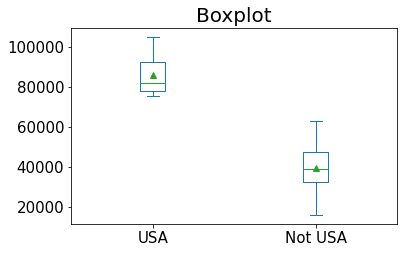

In [81]:
# First check that if there is any significant outliers
box = pd.DataFrame({'USA': usa.salary_in_usd, 'Not USA': not_usa.salary_in_usd})
ax = box[['USA', 'Not USA']].plot(kind='box', title='boxplot', showmeans=True)
ax.set_title('Boxplot',fontsize =20)
plt.rc('legend', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
plt.savefig('boxplot.png')
plt.show()

In [83]:
#Now to test that the data came from a normal distribution. 
#Let’s test this statistically to see if the data is normally distributed. 
#To test this, one can use the Shapiro-Wilk test for normality.
# Unfortunately the output is not labeled. The first value is the W test value, and the second value it the p-value.
print(stats.shapiro(not_usa.salary_in_usd))
print(stats.shapiro(usa.salary_in_usd))

(0.9826304316520691, 0.9638611674308777)
(0.8834657073020935, 0.2853531837463379)


In [85]:
# paired t-test
stats.ttest_rel( usa.salary_in_usd,not_usa.salary_in_usd)
# p-value is less than or equal to the specified significance level α, the null hypothesis is rejected
# we reject the null hypothesis----> the average salary is different in USA and not USA

Ttest_relResult(statistic=9.433784779311871, pvalue=0.0002259232232220033)